In [ ]:
cd /content/drive/MyDrive/Jan/scraping_data_EDA

/content/drive/MyDrive/Jan/scraping_data_EDA


#Introduction

### Background

AI is a broad idea that includes elements of cognitive science, psychology, and statistics. Making computers increasingly capable of autonomous thought was the initial aim of the development of artificial intelligence. AI employs computers that can analyze and learn from outside data.  The "Rating" of a movie is the first aspect of a film that comes to mind while assessing it. A viewer should check a film's rating at least once before watching it. One is interested to learn how the reviewers and the audience have assessed the film. We might get a sense of how the movie could be by examining the ratings given by reviewers and moviegoers.

### Objective/ Aims

As a part of this project I will be focusing on following two main objectives

*  Determining the differences between user/viewer and critic ratings.
To find the top 5 films that, according to the data, maintained a balance between audiences and reviewers. And the top five films that caused the most controversy.
*   For the movies, users create tags. Using such tags, we may gauge the degree to which movies display certain tag-representative characteristics (atmospheric, thought-provoking, realistic, comdecy,etc.) On the basis of a user's search for a certain movie and the tags attached to the movies, we can suggest related films to him.






# Dataset 
### Source 
Movies data is scraped from wikipedia using different python packages.
Packages used are as follows


*   Beautiful soap (bs4)
*   request 

*   pandas library (for storing scraped data in dataframe and saving in csv)


*   tmdbv3api (API for movie database )
*   List item




##Methodology Followed 

#### For Critic Rating
Read the files movies.csv, rating.csv (user ratings), and movies 1.csv (critic ratings) in various dataframes.
tidying up the input file's contents. deleting all entries with the value 'N'.
converting reviews and critic count to floats for analysis' comparative purposes Only films with ratings of at least 30 CRITICS were taken into consideration. Additionally, the movie received at least 500 user ratings.

In order to compare critic reviews to user reviews, the critic reviews are transformed to a scale of 1 to 5. -use the formula below to determine the weighted mean rating of users.
Rating weighted by (v/(v+m))
* R+(m/(v+m))
* C \swhere:
* R is the movie's average (mean) value (Rating)
* V is the number of votes cast for the film (votes)
* m = the number of votes needed to reach the Top 50. (currently 500)
* C is the average vote for the whole report. -looking through the user and critic rating dataframes, we obtain the following dataframes.

#### For Movie Recommendation

Reading the document: 
- Take the movies, tags, ratings, genome-tags, and genome-scores and combine them into a single dataframe.
- Then, choose the tags for that movie whose tag relevance score is larger than 0.5. for each film make a list of the tags that go with it and save it in the dictionary. 
- When a user enters a movie ID, if the movie ID exists in the dataset, 
- the user will be recommended other movies based on the tags associated with each movie.



### Ethical considerations
When integrating a new technology into the decision-making process for an audit, ethical issues must be taken into account. Some ethical considerations needs to take into account for current scenerio.
However, using AI-powered technologies has grave ethical and legal ramifications. Ethical rules created by supranational and multinational organizations already address some of the rising challenges. The primary goals of this project were to solve the difficulties that AI-powered content recommendation engines provide.



Installing required library 

In [ ]:
!pip install tmdbv3api

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import bs4 as bs
import urllib.request
from google.colab import files
import numpy as np
from tmdbv3api import TMDb,Movie
import json
import requests
import os
import csv
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

### Scraping Function
function for scraping data from wikipedia and saving csv in current working directory

In [ ]:
def collect(year):
  df=pd.DataFrame()
  url_link='https://en.wikipedia.org/wiki/List_of_American_films_of_'+year
  source=urllib.request.urlopen(url_link).read()
  soup_instance=bs.BeautifulSoup(source,'lxml')
  tables=soup_instance.find_all('table',class_='wikitable')
  for i in range(1,len(tables)):
    df=df.append(pd.read_html(str(tables))[i],ignore_index=True)
  df.to_csv(year+'.csv')
  files.download(year+'.csv')

#### Getting data from 2018 to 2022 

In [ ]:
for year in range(2018,2022):
  collect(str(year))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### Function for getting Genres for movies

In [ ]:
tmdb=TMDb()
tmdb.api_key='ff5d4bbd48363bb3f65e4c34e204d94b'
tmdb_movie=Movie()
def get_genre(x):
    genres=[]
    result=tmdb_movie.search(x)
    # print('x', x)
    # print('result',result)
    # if len(result)==0:
    movie_id=result[0].id
    response=requests.get('https://api.themoviedb.org/3/movie/{}?api_key={}'.format(movie_id,tmdb.api_key))
    data_json=response.json()
    if data_json['genres']:
        genre_str=" " 
        for i in range(0,len(data_json['genres'])):
            genres.append(data_json['genres'][i]['name'])
        return genre_str.join(genres)
    else:
        np.NaN

### Visualizing 2018 data 

In [ ]:
data_frame_val=pd.read_csv('2018.csv')
data_frame_val.head()

,Unnamed: 0,Opening,Opening.1,Title,Production company,Cast and crew,.mw-parser-output .tooltip-dotted{border-bottom:1px dotted;cursor:help}Ref.,Ref.
0,0,JANUARY,5,Insidious: The Last Key,Universal Pictures / Blumhouse Productions / S...,Adam Robitel (director); Leigh Whannell (scree...,[2],NaN
1,1,JANUARY,5,The Strange Ones,Vertical Entertainment,Lauren Wolkstein (director); Christopher Radcl...,[3],NaN
2,2,JANUARY,5,Stratton,Momentum Pictures,"Simon West (director); Duncan Falconer, Warren...",[4],NaN
3,3,JANUARY,10,Sweet Country,Samuel Goldwyn Films,"Warwick Thornton (director); David Tranter, St...",[5],NaN
4,4,JANUARY,12,The Commuter,Lionsgate / StudioCanal / The Picture Company,Jaume Collet-Serra (director); Byron Willinger...,[6],NaN


## Data Cleaning 
##### After visualizing data, it is evident that some columns are unnecassary and they have nothing to do with current analysis, so these needs to be removed.
Following code removes unnecassary coloumns such as 


*   Unnamed: 0
*   .mw-parser-output .tooltip-dotted{border-bottom:1px dotted;cursor:help} Ref.
*   Opening
*   Opening.1
*   'Ref.'







In [ ]:
data_frame_val.drop(['Unnamed: 0','.mw-parser-output .tooltip-dotted{border-bottom:1px dotted;cursor:help}Ref.','Opening','Opening.1','Ref.'],axis=1,inplace=True)
data_frame_val.head()

,Title,Production company,Cast and crew
0,Insidious: The Last Key,Universal Pictures / Blumhouse Productions / S...,Adam Robitel (director); Leigh Whannell (scree...
1,The Strange Ones,Vertical Entertainment,Lauren Wolkstein (director); Christopher Radcl...
2,Stratton,Momentum Pictures,"Simon West (director); Duncan Falconer, Warren..."
3,Sweet Country,Samuel Goldwyn Films,"Warwick Thornton (director); David Tranter, St..."
4,The Commuter,Lionsgate / StudioCanal / The Picture Company,Jaume Collet-Serra (director); Byron Willinger...


Get genres for each movie data sample and saving in the dataframe 

In [ ]:
data_frame_val['genres'] = data_frame_val['Title'].map(lambda x: get_genre(str(x)))
data_frame_val.head()

,Title,Production company,Cast and crew,genres
0,Insidious: The Last Key,Universal Pictures / Blumhouse Productions / S...,Adam Robitel (director); Leigh Whannell (scree...,Horror Mystery Thriller
1,The Strange Ones,Vertical Entertainment,Lauren Wolkstein (director); Christopher Radcl...,Thriller Drama
2,Stratton,Momentum Pictures,"Simon West (director); Duncan Falconer, Warren...",Action Thriller
3,Sweet Country,Samuel Goldwyn Films,"Warwick Thornton (director); David Tranter, St...",Drama Western Thriller
4,The Commuter,Lionsgate / StudioCanal / The Picture Company,Jaume Collet-Serra (director); Byron Willinger...,Action Thriller Mystery


In [ ]:
data_frame_val.to_csv('2018_with_genres.csv')

In [ ]:
data_frame_val2=pd.read_csv('2019.csv')
data_frame_val2.head()

,Unnamed: 0,Opening,Opening.1,Title,Production company,Cast and crew,Ref.
0,0,JANUARY,4,Escape Room,Columbia Pictures / Original Film,"Adam Robitel (director); Bragi F. Schut, Maria...",[2]
1,1,JANUARY,4,Rust Creek,IFC Films,Jen McGowan (director); Julie Lipson (screenpl...,[3]
2,2,JANUARY,4,American Hangman,Hangman Justice Productions,Wilson Coneybeare (director/screenplay); Donal...,[4]
3,3,JANUARY,11,A Dog's Way Home,Columbia Pictures,Charles Martin Smith (director); W. Bruce Came...,[5]
4,4,JANUARY,11,The Upside,STX Entertainment,Neil Burger (director); Jon Hartmere (screenpl...,[6]


In [ ]:
data_frame_val2.drop(['Unnamed: 0','Opening','Opening.1','Ref.'],axis=1,inplace=True)
data_frame_val2.head()

,Title,Production company,Cast and crew
0,Escape Room,Columbia Pictures / Original Film,"Adam Robitel (director); Bragi F. Schut, Maria..."
1,Rust Creek,IFC Films,Jen McGowan (director); Julie Lipson (screenpl...
2,American Hangman,Hangman Justice Productions,Wilson Coneybeare (director/screenplay); Donal...
3,A Dog's Way Home,Columbia Pictures,Charles Martin Smith (director); W. Bruce Came...
4,The Upside,STX Entertainment,Neil Burger (director); Jon Hartmere (screenpl...


In [ ]:
data_frame_val2['genres'] = data_frame_val2['Title'].map(lambda x: get_genre(str(x)))
data_frame_val2.head()

,Title,Production company,Cast and crew,genres
0,Escape Room,Columbia Pictures / Original Film,"Adam Robitel (director); Bragi F. Schut, Maria...",Horror Thriller Mystery
1,Rust Creek,IFC Films,Jen McGowan (director); Julie Lipson (screenpl...,Thriller Drama Action Crime
2,American Hangman,Hangman Justice Productions,Wilson Coneybeare (director/screenplay); Donal...,Thriller
3,A Dog's Way Home,Columbia Pictures,Charles Martin Smith (director); W. Bruce Came...,Drama Adventure Family
4,The Upside,STX Entertainment,Neil Burger (director); Jon Hartmere (screenpl...,Comedy Drama


In [ ]:
data_frame_val2.to_csv('2019_with_genres.csv')

In [ ]:
data_frame_val3=pd.read_csv('2020.csv')
data_frame_val3.head()

,Unnamed: 0,Opening,Opening.1,Title,Production company,Cast and crew,.mw-parser-output .tooltip-dotted{border-bottom:1px dotted;cursor:help}Ref.,Ref.
0,0,JANUARY,3,The Grudge,Screen Gems / Stage 6 Films / Ghost House Pict...,Nicolas Pesce (director/screenplay); Andrea Ri...,[2],NaN
1,1,JANUARY,10,Underwater,20th Century Fox / TSG Entertainment / Chernin...,"William Eubank (director); Brian Duffield, Ada...",[3],NaN
2,2,JANUARY,10,Like a Boss,Paramount Pictures,"Miguel Arteta (director); Sam Pitman, Adam Col...",[4],NaN
3,3,JANUARY,10,Three Christs,IFC Films,Jon Avnet (director/screenplay); Eric Nazarian...,NaN,NaN
4,4,JANUARY,10,Inherit the Viper,Barry Films / Tycor International Film Company,Anthony Jerjen (director); Andrew Crabtree (sc...,[5],NaN


In [ ]:
data_frame_val3.drop(['Unnamed: 0','Opening','Opening.1','Ref.', '.mw-parser-output .tooltip-dotted{border-bottom:1px dotted;cursor:help}Ref.'],axis=1,inplace=True)
data_frame_val3.head()

,Title,Production company,Cast and crew
0,The Grudge,Screen Gems / Stage 6 Films / Ghost House Pict...,Nicolas Pesce (director/screenplay); Andrea Ri...
1,Underwater,20th Century Fox / TSG Entertainment / Chernin...,"William Eubank (director); Brian Duffield, Ada..."
2,Like a Boss,Paramount Pictures,"Miguel Arteta (director); Sam Pitman, Adam Col..."
3,Three Christs,IFC Films,Jon Avnet (director/screenplay); Eric Nazarian...
4,Inherit the Viper,Barry Films / Tycor International Film Company,Anthony Jerjen (director); Andrew Crabtree (sc...


In [ ]:
data_frame_val3.tail()

,Title,Production company,Cast and crew
270,We Can Be Heroes,Netflix / Troublemaker Studios / Double R Prod...,Robert Rodriguez (director/screenplay); Priyan...
271,News of the World,Universal Pictures / Perfect World Pictures,Paul Greengrass (director/screenplay); Luke Da...
272,One Night in Miami...,Amazon Studios,Regina King (director); Kemp Powers (screenpla...
273,Promising Young Woman,Focus Features / FilmNation Entertainment,Emerald Fennell (director/screenplay); Carey M...
274,Pieces of a Woman,Netflix / Bron Studios,Kornél Mundruczó (director); Kata Wéber (scree...


In [ ]:
data_frame_val4=pd.read_csv('2021.csv')
data_frame_val4.head()

,Unnamed: 0,Opening,Opening.1,Title,Production company,Cast and crew,.mw-parser-output .tooltip-dotted{border-bottom:1px dotted;cursor:help}Ref.,Ref.
0,0,JANUARY,1.0,Shadow in the Cloud,Vertical Entertainment,Roseanne Liang (director/screenplay); Max Land...,[2],NaN
1,1,JANUARY,13.0,The White Tiger,Netflix,Ramin Bahrani (director/screenplay); Adarsh Go...,NaN,NaN
2,2,JANUARY,14.0,Locked Down,HBO Max / Warner Bros. Pictures,Doug Liman (director); Steven Knight (screenpl...,[3],NaN
3,3,JANUARY,15.0,The Dig,Netflix / Clerkenwell Films,Simon Stone (director); Moira Buffini (screenp...,[4],NaN
4,4,JANUARY,15.0,Outside the Wire,Netflix,"Mikael Håfström (director); Rob Yescombe, Rowa...",[5],NaN


In [ ]:
data_frame_val4.drop(['Unnamed: 0','Opening','Opening.1','Ref.' , '.mw-parser-output .tooltip-dotted{border-bottom:1px dotted;cursor:help}Ref.'],axis=1,inplace=True)
data_frame_val4.head()

,Title,Production company,Cast and crew
0,Shadow in the Cloud,Vertical Entertainment,Roseanne Liang (director/screenplay); Max Land...
1,The White Tiger,Netflix,Ramin Bahrani (director/screenplay); Adarsh Go...
2,Locked Down,HBO Max / Warner Bros. Pictures,Doug Liman (director); Steven Knight (screenpl...
3,The Dig,Netflix / Clerkenwell Films,Simon Stone (director); Moira Buffini (screenp...
4,Outside the Wire,Netflix,"Mikael Håfström (director); Rob Yescombe, Rowa..."


In [ ]:
data_frame_val4['genres'] = data_frame_val4['Title'].map(lambda x: get_genre(str(x)))
data_frame_val4.head()

In [ ]:
data_frame_val4.to_csv('2021_with_genres.csv')

Appending dataframes to get single aggregated data file

In [ ]:
df12=data_frame_val.append(data_frame_val2,ignore_index=True)
df=df12.append(data_frame_val4,ignore_index=True)
df.head()

,Title,Production company,Cast and crew,genres
0,Insidious: The Last Key,Universal Pictures / Blumhouse Productions / S...,Adam Robitel (director); Leigh Whannell (scree...,Horror Mystery Thriller
1,The Strange Ones,Vertical Entertainment,Lauren Wolkstein (director); Christopher Radcl...,Thriller Drama
2,Stratton,Momentum Pictures,"Simon West (director); Duncan Falconer, Warren...",Action Thriller
3,Sweet Country,Samuel Goldwyn Films,"Warwick Thornton (director); David Tranter, St...",Drama Western Thriller
4,The Commuter,Lionsgate / StudioCanal / The Picture Company,Jaume Collet-Serra (director); Byron Willinger...,Action Thriller Mystery


In [ ]:
df.to_csv('2018_and_2019_and_2021_final.csv')

In [ ]:
cd /content/drive/MyDrive/Jan/scraping_data_EDA/Data

/content/drive/MyDrive/Jan/scraping_data_EDA/Data


In [ ]:
data_frame_movies_val = pd.read_csv( 'movies.csv', encoding='ISO-8859-1')         #read movies csv file into a dataframe
data_frame_movies_val.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
dataframe_rating_valll = pd.read_csv( 'ratings.csv', encoding='ISO-8859-1')
dataframe_rating_valll.head()
#dataframe_rating_valll.shape

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [ ]:
df_critics_rating = pd.read_csv('movies_1.csv', encoding='ISO-8859-1')
df_critics_rating.head()

,id,title,imdbID,spanishTitle,imdbPictureURL,year,rtID,rtAllCriticsRating,rtAllCriticsNumReviews,rtAllCriticsNumFresh,...,rtAllCriticsScore,rtTopCriticsRating,rtTopCriticsNumReviews,rtTopCriticsNumFresh,rtTopCriticsNumRotten,rtTopCriticsScore,rtAudienceRating,rtAudienceNumRatings,rtAudienceScore,rtPictureURL
0,1,Toy story,114709,Toy story (juguetes),http://ia.media-imdb.com/images/M/MV5BMTMwNDU0...,1995,toy_story,9,73,73,...,100,8.5,17,17,0,100,3.7,102338,81,http://content7.flixster.com/movie/10/93/63/10...
1,2,Jumanji,113497,Jumanji,http://ia.media-imdb.com/images/M/MV5BMzM5NjE1...,1995,1068044-jumanji,5.6,28,13,...,46,5.8,5,2,3,40,3.2,44587,61,http://content8.flixster.com/movie/56/79/73/56...
2,3,Grumpy Old Men,107050,Dos viejos gruñones,http://ia.media-imdb.com/images/M/MV5BMTI5MTgy...,1993,grumpy_old_men,5.9,36,24,...,66,7,6,5,1,83,3.2,10489,66,http://content6.flixster.com/movie/25/60/25602...
3,4,Waiting to Exhale,114885,Esperando un respiro,http://ia.media-imdb.com/images/M/MV5BMTczMTMy...,1995,waiting_to_exhale,5.6,25,14,...,56,5.5,11,5,6,45,3.3,5666,79,http://content9.flixster.com/movie/10/94/17/10...
4,5,Father of the Bride Part II,113041,Vuelve el padre de la novia (Ahora también abu...,http://ia.media-imdb.com/images/M/MV5BMTg1NDc2...,1995,father_of_the_bride_part_ii,5.3,19,9,...,47,5.4,5,1,4,20,3,13761,64,http://content8.flixster.com/movie/25/54/25542...


- cleaning the data of input file. Removing all records having '\\N' as values. 
- converting ratings and number of critics to float so that can be used comparison

In [ ]:
df_critics_rating = df_critics_rating.filter(['id','rtAllCriticsRating', 'rtAllCriticsNumReviews'], axis=1)
df_critics_rating = df_critics_rating[df_critics_rating.rtAllCriticsRating.apply(lambda x: x != '\\N')]
df_critics_rating['rtAllCriticsNumReviews'] = df_critics_rating.rtAllCriticsNumReviews.astype(float)
df_critics_rating['rtAllCriticsRating'] = df_critics_rating.rtAllCriticsRating.astype(float)

- Taking into considertaion those movies which have rated by atleast 30 critics

In [ ]:
df_x = df_critics_rating[(df_critics_rating['rtAllCriticsNumReviews'])> 30.0]
#df_x.dtypes

- renaming the column for use in join later
- calculating the ratings by critics to equivalent of 5 

In [ ]:
df_x = df_x.rename(columns={'id':'movieId'})
df_x['rtAllCriticsRating'] =df_x['rtAllCriticsRating']*0.5 #calculate the equivalent rating from 5
df_x['rtAllCriticsNumReviews'] = df_x.rtAllCriticsNumReviews.astype(int)
df_x.head()

,movieId,rtAllCriticsRating,rtAllCriticsNumReviews
0,1,4.50,73
2,3,2.95,36
5,6,3.85,58
6,7,3.70,31
8,9,2.60,32


# The weighted rating of users is determined using the weighted mean algorithm.
- weighted rating = (v/(v+m))R+(m/(v+m))C
- where:
- R = average for the movie (mean) = (Rating)
- v = number of votes for the movie = (votes)
- m = minimum votes required to be listed in the Top 50 (currently 500)
- C = the mean vote across the whole report 

- calculating value of R

In [ ]:
df_avg_rating = dataframe_rating_valll.groupby('movieId').mean()
df_avg_rating = df_avg_rating[['rating']]
df_avg_rating = df_avg_rating.sort_values(by='rating', ascending = False)
df_avg_rating = df_avg_rating.reset_index()
df_avg_rating.head()

,movieId,rating
0,2326,5.0
1,5351,5.0
2,49225,5.0
3,1470,5.0
4,81665,5.0


- calculating value of C

In [ ]:
c = df_avg_rating['rating'].mean()  # the mean vote across the whole report

- calculating total no of votes/ratings for each , V

In [ ]:
df_counts = dataframe_rating_valll.groupby('movieId').count()
df_counts = df_counts[['userId']]
df_counts = df_counts.sort_values(by='userId', ascending = False)
df_counts = df_counts.reset_index()
#df_counts.shape

- presuming that the minimum number of votes needed to be included in the top 10 is 500;
- taking into consideration films with at least 500 user ratings

In [ ]:
df_counts = df_counts[df_counts['userId'] > 500]  #considering 500 as threshhold for minimum votes to be listed in top 10
df_counts.head()

,movieId,userId
0,296,1503
1,356,1478
2,593,1370
3,318,1364
4,480,1319


In [ ]:
dataframe_result_val = pd.merge(df_avg_rating, df_counts, on = 'movieId')
dataframe_result_val.head()

,movieId,rating,userId
0,318,4.462610,1364
1,858,4.393215,899
2,50,4.371745,1037
3,1221,4.285831,614
4,912,4.265504,516


- Calculating weighted mean rating of users

In [ ]:
dataframe_result_val['weighted_rating'] =((dataframe_result_val['userId']/(dataframe_result_val['userId']+500))*dataframe_result_val['rating'] + (500/(dataframe_result_val['userId']+500))*c)
dataframe_result_val = dataframe_result_val.sort_values(by='weighted_rating', ascending = 'False')
dataframe_result_val.head()

,movieId,rating,userId,weighted_rating
127,208,2.860269,594,3.027062
126,231,2.896599,735,3.029640
125,344,2.952299,870,3.051902
124,153,2.981322,696,3.083283
123,586,3.081600,625,3.145428


- Extracting year from movie title

In [ ]:
data_frame_movies_val['year'] = data_frame_movies_val.title.apply(lambda x : int(x[-5:-1]) if x[-5:-1].isdigit() else 1900)  # extract year of movie from title
data_frame_movies_val.sort_values(by='year', ascending =  False).head()

,movieId,title,genres,year
26487,127122,Last Days in the Desert (2015),Adventure|Drama,2015
27122,130490,Insurgent (2015),Action|Romance|Sci-Fi,2015
26496,127140,Sleeping with Other People (2015),Comedy,2015
26495,127138,Ten Thousand Saints (2015),Comedy|Drama,2015
26494,127136,True Story (2015),Drama|Mystery|Thriller,2015


- merging ratings and movie titles

In [ ]:
dataframe_result_val = pd.merge(dataframe_result_val, data_frame_movies_val, on='movieId')
dataframe_result_val.head()

,movieId,rating,userId,weighted_rating,title,genres,year
0,208,2.860269,594,3.027062,Waterworld (1995),Action|Adventure|Sci-Fi,1995
1,231,2.896599,735,3.029640,Dumb & Dumber (Dumb and Dumber) (1994),Adventure|Comedy,1994
2,344,2.952299,870,3.051902,Ace Ventura: Pet Detective (1994),Comedy,1994
3,153,2.981322,696,3.083283,Batman Forever (1995),Action|Adventure|Comedy|Crime,1995
4,586,3.081600,625,3.145428,Home Alone (1990),Children|Comedy,1990


In [ ]:
dataframe_result_val = dataframe_result_val.drop(['userId','rating'] , axis = 1)

In [ ]:
dataframe_result_val = dataframe_result_val.rename(columns = {'weighted_rating':'user_rating'})
dataframe_result_val.head()

,movieId,user_rating,title,genres,year
0,208,3.027062,Waterworld (1995),Action|Adventure|Sci-Fi,1995
1,231,3.029640,Dumb & Dumber (Dumb and Dumber) (1994),Adventure|Comedy,1994
2,344,3.051902,Ace Ventura: Pet Detective (1994),Comedy,1994
3,153,3.083283,Batman Forever (1995),Action|Adventure|Comedy|Crime,1995
4,586,3.145428,Home Alone (1990),Children|Comedy,1990


- merging dataframes with user ratings and critics rating

In [ ]:
output_dataframe_val = pd.merge(dataframe_result_val, df_x, on='movieId' )
output_dataframe_val = output_dataframe_val.sort_values(by='year')
output_dataframe_val = output_dataframe_val.rename(columns = {'rtAllCriticsRating':'critics_rating'})
output_dataframe_val.head()

,movieId,user_rating,title,genres,year,critics_rating,rtAllCriticsNumReviews
63,919,3.603146,"Wizard of Oz, The (1939)",Adventure|Children|Fantasy|Musical,1939,4.6,70
91,912,3.753549,Casablanca (1942),Drama|Romance,1942,4.5,58
83,750,3.728744,Dr. Strangelove or: How I Learned to Stop Worr...,Comedy|War,1964,4.5,58
62,924,3.592949,2001: A Space Odyssey (1968),Adventure|Drama|Sci-Fi,1968,4.4,53
111,858,3.975773,"Godfather, The (1972)",Crime|Drama,1972,4.5,66


In [ ]:
output_dataframe_val.to_csv('User_Rating.csv', index = False)

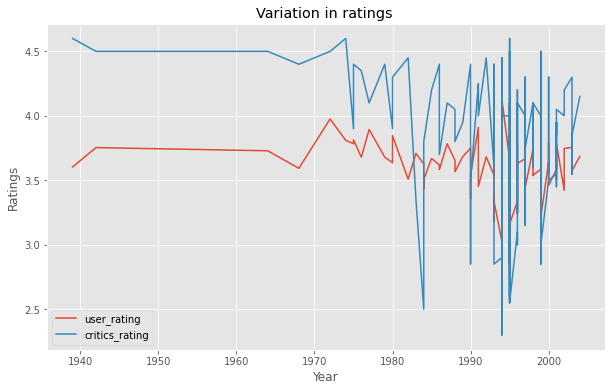

In [ ]:
matplotlib.style.use('ggplot')
ax =output_dataframe_val.plot(x='year', y=['user_rating','critics_rating'] , figsize=(10,6), title='Variation in ratings ')
ax.set_xlabel('Year')
ax.set_ylabel('Ratings')
plt.savefig('ratings_variation.jpeg')

In [ ]:
dataframe_output1_val = output_dataframe_val[['movieId','title','user_rating','critics_rating']]
dataframe_output1_val['title'] = output_dataframe_val.title.apply(lambda x : x[:-6])
dataframe_output1_val.head()

<ipython-input-33-793408c527e2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_output1['title'] = df_output.title.apply(lambda x : x[:-6])


,movieId,title,user_rating,critics_rating
63,919,"Wizard of Oz, The",3.603146,4.6
91,912,Casablanca,3.753549,4.5
83,750,Dr. Strangelove or: How I Learned to Stop Worr...,3.728744,4.5
62,924,2001: A Space Odyssey,3.592949,4.4
111,858,"Godfather, The",3.975773,4.5


In [ ]:
dataframe_output1_val['difference'] = dataframe_output1_val['critics_rating'] - dataframe_output1_val['user_rating']
dataframe_output1_val.head()

<ipython-input-34-41a03b4a065b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_output1['difference'] = df_output1['critics_rating'] - df_output1['user_rating']


,movieId,title,user_rating,critics_rating,difference
63,919,"Wizard of Oz, The",3.603146,4.6,0.996854
91,912,Casablanca,3.753549,4.5,0.746451
83,750,Dr. Strangelove or: How I Learned to Stop Worr...,3.728744,4.5,0.771256
62,924,2001: A Space Odyssey,3.592949,4.4,0.807051
111,858,"Godfather, The",3.975773,4.5,0.524227


In [ ]:
dataframe_output1_val['difference'] = dataframe_output1_val.difference.apply(lambda x : x if x > 0 else (x*-1))  # extract year of movie from title
dataframe_output1_val = dataframe_output1_val.sort_values(by='difference' , ascending= False)

<ipython-input-35-6d5365724988>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_output1['difference'] = df_output1.difference.apply(lambda x : x if x > 0 else (x*-1))  # extract year of movie from title


- movies that were highly divisive

In [ ]:
movies_divisive_set = dataframe_output1_val.head()
movies_divisive_set

,movieId,title,user_rating,critics_rating,difference
65,1240,"Terminator, The",3.627591,2.50,1.127591
63,919,"Wizard of Oz, The",3.603146,4.60,0.996854
43,3114,Toy Story 2,3.519297,4.50,0.980703
39,1097,E.T. the Extra-Terrestrial,3.508514,4.45,0.941486
62,924,2001: A Space Odyssey,3.592949,4.40,0.807051


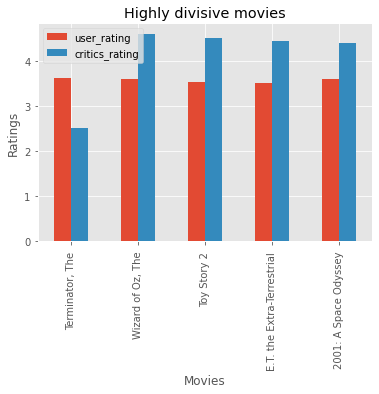

In [ ]:
ax = movies_divisive_set.plot.bar(x='title', y=['user_rating', 'critics_rating'],title='Highly divisive movies')
ax.set_xlabel('Movies')
ax.set_ylabel('Ratings')
plt.savefig('movies_divisive_set.jpeg')

According to the storyline, user ratings have changed throughout time in a small range of 2.5–4.2, whereas reviewers have given the same films scores as low as 1.0 and as high as 4.7. Users assess movies mostly based on their enjoyment of the stories, but critics evaluate films based on their overall quality.



Strongly divisive films
movies that have been produced only for the general public with interesting plots or films made from the viewpoint of critics and judges.
ratings for these films vary greatly among both audiences and reviewers.

##Balanced Movies
movies that were produced with the intention of maintaining a balance between audience, reviewers, and judges.
Such films' user and reviewer ratings vary relatively little.

- movies that maintained balance between user and critics are given as follows.

In [ ]:
movies_balanced_set  = dataframe_output1_val.tail()

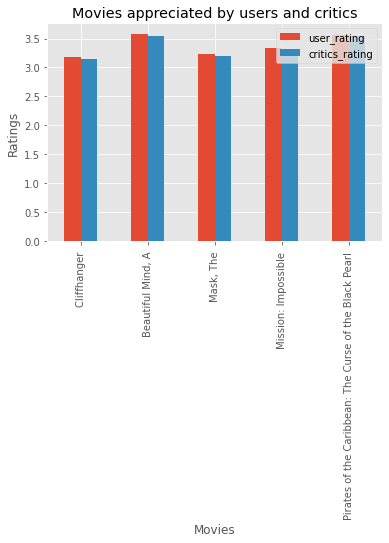

In [ ]:
ax1 = movies_balanced_set.plot.bar(x='title', y=['user_rating', 'critics_rating'] , title = 'Movies appreciated by users and critics')
ax1.set_xlabel('Movies')
ax1.set_ylabel('Ratings')
plt.savefig('movies_balanced_set.jpeg')

# Recommended movies to a user
- based on his search for a particular movie

In [ ]:
dataframe_tags_val1 = pd.read_csv( 'tags.csv', encoding='ISO-8859-1')         #read tags csv file into a dataframe
dataframe_tags_val1.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,1240597180
1,65,208,dark hero,1368150078
2,65,353,dark hero,1368150079
3,65,521,noir thriller,1368149983
4,65,592,dark hero,1368150078


In [ ]:
dataframe_tags_genome1 = pd.read_csv( 'genome-tags.csv', encoding='ISO-8859-1')         #read genome-tags csv file into a dataframe
dataframe_tags_genome1.head()

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


In [ ]:
dataframe_tags_scores_mov1 = pd.read_csv( 'genome-scores.csv', encoding='ISO-8859-1')         #read genome-tags csv file into a dataframe
dataframe_tags_scores_mov1.head()

,movieId,tagId,relevance
0,1,1,0.02500
1,1,2,0.02500
2,1,3,0.05775
3,1,4,0.09675
4,1,5,0.14675


In [ ]:
dataframe_tags_m_data = pd.merge(dataframe_tags_val1,dataframe_tags_genome1, on='tag')
dataframe_tags_m_data.head()

,userId,movieId,tag,timestamp,tagId
0,65,208,dark hero,1368150078,288
1,65,353,dark hero,1368150079,288
2,65,592,dark hero,1368150078,288
3,65,6874,dark hero,1368150079,288
4,558,5146,dark hero,1367991811,288


In [ ]:
data_frame_movies_val = pd.read_csv( 'movies.csv', encoding='ISO-8859-1')  #read genome-tags csv file into a dataframe
data_frame_movies_val['title'] = data_frame_movies_val.title.apply(lambda x : x[:-6])
data_frame_movies_val.head()

,movieId,title,genres
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji,Adventure|Children|Fantasy
2,3,Grumpier Old Men,Comedy|Romance
3,4,Waiting to Exhale,Comedy|Drama|Romance
4,5,Father of the Bride Part II,Comedy


In [ ]:
dataframe_rating_valll = pd.read_csv( 'ratings.csv', encoding='ISO-8859-1')         #read genome-tags csv file into a dataframe
dataframe_rating_d = dataframe_rating_valll[['movieId','rating']]
dataframe_rating_d.head()

,movieId,rating
0,2,3.5
1,29,3.5
2,32,3.5
3,47,3.5
4,50,3.5


In [ ]:
dataframe_rating_d = dataframe_rating_d.groupby('movieId')['rating'].mean().reset_index()
dataframe_rating_d = pd.DataFrame(dataframe_rating_d)

In [ ]:
dataframe_rating_d.head()

,movieId,rating
0,1,3.973495
1,2,3.294845
2,3,3.195572
3,4,3.110000
4,5,3.168385


In [ ]:
dataframe_tags_m_data = pd.merge(dataframe_tags_m_data, dataframe_tags_scores_mov1, on=['movieId','tagId'])
dataframe_tags_m_data.head()
#dataframe_tags_m_data.shape

,userId,movieId,tag,timestamp,tagId,relevance
0,65,208,dark hero,1368150078,288,0.9495
1,7671,208,dark hero,1368805051,288,0.9495
2,8513,208,dark hero,1368317181,288,0.9495
3,14517,208,dark hero,1368211016,288,0.9495
4,23333,208,dark hero,1368664453,288,0.9495


- Take into account tags with a larger than 0.5 relevance score for that particular movie.

In [ ]:
dataframe_tags_m_data = dataframe_tags_m_data[dataframe_tags_m_data['relevance'] > 0.5]

In [ ]:
dataframe_tags_m_data = pd.merge(dataframe_tags_m_data, data_frame_movies_val, on=['movieId'])
dataframe_tags_m_data.head()

,userId,movieId,tag,timestamp,tagId,relevance,title,genres
0,65,208,dark hero,1368150078,288,0.9495,Waterworld,Action|Adventure|Sci-Fi
1,7671,208,dark hero,1368805051,288,0.9495,Waterworld,Action|Adventure|Sci-Fi
2,8513,208,dark hero,1368317181,288,0.9495,Waterworld,Action|Adventure|Sci-Fi
3,14517,208,dark hero,1368211016,288,0.9495,Waterworld,Action|Adventure|Sci-Fi
4,23333,208,dark hero,1368664453,288,0.9495,Waterworld,Action|Adventure|Sci-Fi


- Function that creates a dictionary of movie and its tags

In [ ]:
def movie_tag(x):
    all_tags_list = dataframe_tags_m_data.loc[dataframe_tags_m_data['movieId'] == x, 'tag']
    tag_list = (set(all_tags_list))
    if x not in movie_tags:
        movie_tags[x] = tag_list

In [ ]:
movie_tags ={}
dataframe_funcc_val = dataframe_tags_m_data['movieId'].apply(lambda x : movie_tag(x))  # apply func on each row of dataframe 

- Take input from user as Movie ID

In [ ]:
movie_id = input()

208


In [ ]:
related_tags = []
movie_id = int(movie_id)
if movie_id in movie_tags:
    related_tags = movie_tags[movie_id]
else:
    print('Movie not in dataset')
#related_tags

In [ ]:
tag_count = {}
for tag in related_tags: 
    for movie in movie_tags:
        if tag in movie_tags[movie]:
            if movie not in tag_count:
                tag_count[movie] = 1
            else:
                tag_count[movie] += 1
#tag_count


In [ ]:
rel_movie_val = pd.DataFrame(list(tag_count.items()) , columns = ['movieId','relatedTagCount'])
rel_movie_val = rel_movie_val[rel_movie_val['relatedTagCount'] > 2]
rel_movie_val = rel_movie_val.sort_values(by='relatedTagCount', ascending = False)
rel_movie_val = pd.merge(rel_movie_val, data_frame_movies_val, on='movieId')
rel_movie_val = rel_movie_val[rel_movie_val.movieId != movie_id]
rel_movie_val = rel_movie_val.head()
rel_movie_val

,movieId,relatedTagCount,title,genres
1,32,5,Twelve Monkeys (a.k.a. 12 Monkeys),Mystery|Sci-Fi|Thriller
2,173,3,Judge Dredd,Action|Crime|Sci-Fi


In [ ]:
movie_name = data_frame_movies_val['title'].loc[data_frame_movies_val['movieId'] == movie_id]
movie_name = list(movie_name)
(movie_name[0])

'Waterworld '

In [ ]:
rel_movie_val = pd.merge(rel_movie_val,dataframe_rating_d, on ='movieId')
rel_movie_val

,movieId,relatedTagCount,title,genres,rating
0,32,5,Twelve Monkeys (a.k.a. 12 Monkeys),Mystery|Sci-Fi|Thriller,3.902577
1,173,3,Judge Dredd,Action|Crime|Sci-Fi,2.602817


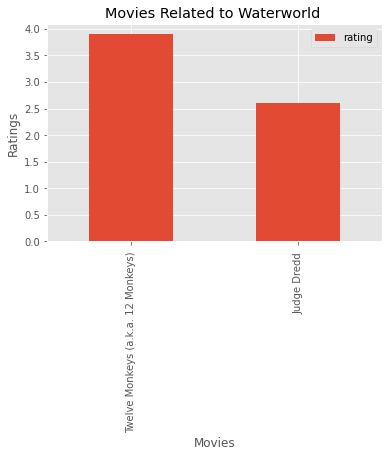

In [ ]:
ax = rel_movie_val.plot.bar(x='title', y='rating', title=('Movies Related to '+movie_name[0]))
ax.set_xlabel('Movies')
ax.set_ylabel('Ratings')
plt.savefig('rel_movie_val.jpeg')

In [ ]:
all_tags_list = dataframe_tags_m_data.loc[dataframe_tags_m_data['movieId'] == movie_id, 'tag']
all_tags_list

0     dark hero
1     dark hero
2     dark hero
3     dark hero
4     dark hero
        ...    
86        ocean
87        ocean
88        ocean
89     horrible
90     horrible
Name: tag, Length: 91, dtype: object

In [ ]:
#all_tags_list =str(all_tags_list)
strng = ''
for i in list(all_tags_list):
    strng = strng + ',' +i
strng

',dark hero,dark hero,dark hero,dark hero,dark hero,dark hero,dark hero,dark hero,dark hero,sci-fi,sci-fi,sci-fi,sci-fi,post-apocalyptic,post-apocalyptic,post-apocalyptic,post-apocalyptic,post-apocalyptic,post-apocalyptic,post-apocalyptic,post-apocalyptic,post-apocalyptic,post-apocalyptic,post-apocalyptic,post-apocalyptic,post-apocalyptic,post-apocalyptic,post-apocalyptic,post-apocalyptic,post-apocalyptic,post-apocalyptic,post-apocalyptic,post-apocalyptic,post-apocalyptic,adventure,adventure,adventure,adventure,dystopia,dystopia,dystopia,dystopia,dystopia,dystopia,dystopia,dystopia,dystopic future,dystopic future,dystopic future,survival,survival,survival,survival,survival,survival,survival,apocalypse,apocalypse,apocalypse,apocalypse,apocalypse,apocalypse,apocalypse,apocalypse,apocalypse,apocalypse,apocalypse,apocalypse,apocalypse,apocalypse,apocalypse,futuristic,futuristic,big budget,big budget,big budget,big budget,alone in the world,alone in the world,alone in the world,ocean,ocean,

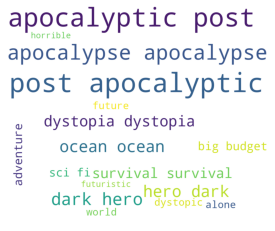

In [ ]:
wc_2015 = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='white',
                          width=1200,
                          height=1000
                         ).generate(strng)


plt.imshow(wc_2015)
plt.axis('off')
plt.show()

### Conclusion

According to the storyline, user ratings have changed throughout time in a small range of 2.5–4.2, whereas reviewers have given the same films scores as low as 1.0 and as high as 4.7. Users assess movies mostly based on their enjoyment of the stories, but critics evaluate films based on their overall quality.

### References/ Resources 

- Webscraping lecture and lab, Dr Sean McGrath
P. de Wulf. (2021, Mar. 26). Web Scraping with BeautifulSoup 
-  https://www.scrapingbee.com/blog/python-web-scraping-beautiful-soup/
Skytowner. (2021, Mar. 18). 
- D. Vu. (2019, Nov. 08). Generating WordClouds in Python [Online]. Available: https://www.datacamp.com/community/tutorials/wordcloud-python

- Forecasting Movie Rating ThroughData AnalyticsLatika Kharb1(&), Deepak Chahal1, and Vagisha , Jagan Institute of Management Studie

- https://www.mygreatlearning.com/blog/masterclass-on-movie-recommendation-system/

- K. Fessel. (2020, June 29). Introduction to Seaborn YouTube series. Available at: https://www.youtube.com/playlist?list=PLtPIclEQf-3cG31dxSMZ8KTcDG7zYng1j